In [13]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [2]:
# Get list of delays
TTL_THRESHOLD = 1.0
AUDIO_THRESHOLD = 0.001

delays = []

with open("timing_test.txt") as f:
    pending_pulse_index = None
    
    for i, line in enumerate(f):
        ttl, audio = line.strip().split()
        ttl = float(ttl)
        audio = float(audio)
    
        if ttl > TTL_THRESHOLD and pending_pulse_index is None:
            pending_pulse_index = i
            
        if audio > AUDIO_THRESHOLD and pending_pulse_index is not None:
            delay = i - pending_pulse_index
            delays.append(delay)
            pending_pulse_index = None

samples:  129
mean:  0.001108062015503876
sd:  0.00012518784335561903


(array([27., 46., 39.,  4.,  1.,  0.,  3.,  1.,  1.,  7.]),
 array([0.00098 , 0.001036, 0.001092, 0.001148, 0.001204, 0.00126 ,
        0.001316, 0.001372, 0.001428, 0.001484, 0.00154 ]),
 <BarContainer object of 10 artists>)

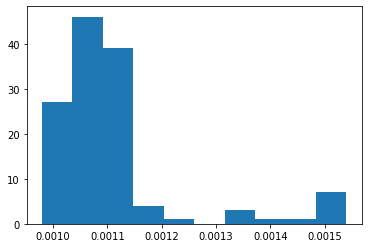

In [18]:
# Calculate average delay in secs
fs = 50000
delays_sec = np.asarray(delays)/fs
print("samples: ", len(delays_sec))
print("mean: ", statistics.mean(delays_sec))
print("sd: ", statistics.stdev(delays_sec))

# Plot histogram of delays
plt.hist(delays_sec)

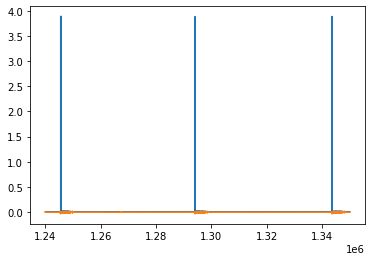

In [17]:
# Plot sample of TTL pulses
indexes = [];
ttls = []
audios = []
with open("/Users/letitiaho/Downloads/timing_test.txt") as f:
    pending_pulse_index = None
    
    for i, line in enumerate(f):
        if i < 1240000 or i > 1350000:
            continue
            
        ttl, audio = line.strip().split()
        indexes.append(i)
        ttls.append(float(ttl))
        audios.append(float(audio))
        
plt.plot(indexes, ttls)
plt.plot(indexes, audios)